<a href="https://colab.research.google.com/github/marcosarto/HDR_Regression/blob/main/COLAB/digital_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# TensorFlow
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn import datasets, ensemble
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, r2_score, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor, StackingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from scipy.spatial import distance
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import plot_importance

In [ ]:
 data = pd.read_csv('M100updated.csv')

In [ ]:
data.head(100)

,id,x,y,csi,lambda,gamma,h,targetGlobale,target
0,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1,3,24,84,6.543678e+12,89.750326,1.000000,4.817507,0.923444,0.097123
2,3,25,84,3.449374e+13,89.769260,1.000000,4.817507,0.923444,0.097123
3,3,26,84,7.319014e+13,90.345499,0.841395,4.817507,0.923444,0.097123
4,3,27,84,3.546188e+14,90.510596,0.841395,4.817507,0.923444,0.097123
...,...,...,...,...,...,...,...,...,...
95,5,28,123,9.016937e+15,93.223435,0.421697,3.601694,0.923444,0.000000
96,5,29,123,3.563771e+16,99.246739,0.251189,3.601694,0.923444,0.000000
97,5,24,124,1.887366e+11,89.937138,0.421697,3.601694,0.923444,0.000000
98,5,25,124,4.743198e+12,90.639986,1.000000,3.601694,0.923444,0.000000


## Normalizzazione tra 0 - 1

Sottraggo la media e divido per la deviazione standard

In [ ]:
def scale_data(X_train, X_test):
    "Scalo i dati tra 0-1 in base al loro valore nel dataframe"
    
    sc = MinMaxScaler()

    sc.fit(X_train)

    train_sc = sc.transform(X_train)
    test_sc = sc.transform(X_test)
    
    return train_sc, test_sc

## Load data

In [ ]:
# Pongo i dati a float (per fare poi la normalizzazione)
data = data.astype(float)
data.drop('id', inplace=True, axis=1)
data.drop('x', inplace=True, axis=1) # Per ora non ci interessano le coordinate dei pixel
data.drop('y', inplace=True, axis=1)
X = data.drop('target',axis=1) # Colonne PassengerId inutile, survived viene salvata in y
y = data['target']

In [ ]:
data.head()

,csi,lambda,gamma,target
0,1.106158e+11,90.448581,1.000000,0.002449
1,8.642282e+12,90.691404,1.000000,0.002449
2,5.824539e+14,91.415581,1.000000,0.002449
3,6.115049e+14,93.022131,0.421697,0.002449
4,2.352717e+16,93.244068,0.421697,0.002449


## Split and Scale data

In [ ]:
# Divido tra train e validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42)

# Scalo tra 0 e 1
X_train_sc, X_test_sc = scale_data(X_train, X_test)

# Gradient Boosting Regressor (Matteo)

Applichiamo ora il Gradient Boosting Regression, un algoritmo più sofisticato visto a lezione.

In [ ]:
params = {'n_estimators': 3000,
          'max_depth': 4,
          'max_features': 'sqrt',
          'min_samples_leaf': 15,
          'min_samples_split': 10,
          'learning_rate': 0.05,
          'loss': 'huber',
          'random_state':42}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train_sc, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Utilizziamo la tecnica della Grid-Search per verificare quale sia effettivamente il modello migliore in base ai parametri inseriti

In [ ]:
param_grid = {'n_estimators': [3000],
          'max_depth': [3],
          'max_features': ['sqrt'],
          'min_samples_leaf': [15],
          'min_samples_split': [10],
          'learning_rate': [0.1],
          'loss': ['huber'],
          'random_state': [42] }

# Create Stratified folds
cross_validation = StratifiedKFold(n_splits=3)
cross_validation.get_n_splits(X_train_sc, y_train)

#reg = Ridge()
reg=ensemble.GradientBoostingRegressor()
gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5) 
gridsearch.fit(X_train_sc, y_train)

print("Best score: {}".format(gridsearch.best_score_))
print("Best parameters: {}".format(gridsearch.best_params_))

best_clf = gridsearch.best_estimator_
best_clf
best_clf.score(X_test_sc, y_test)

Best score: 0.9825190954441853
Best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 3000, 'random_state': 42}


0.9451252853704802

# Neural Network (Marco)



In [ ]:
def make_net(number_features, 
             hidden_layers=3, 
             hidden_layer_neurones=128, 
             dropout=0.0, 
             learning_rate=0.003):
    
    # Forse non più necessario, pulisce eventuali rimanenze
    K.clear_session()
    
    # Creo una neural completamente connessa
    net = Sequential()
    
    # For che crea gli strati
    for i in range(hidden_layers):
        # Tutti gli strati usano ReLu come funzione di attivazione tranne l'output
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='relu'))
        # Trattamento dell'overfit con dropout (lo aggiungo dopo ogni layer)
        # Potrei usare anche tecniche che lo mettono solo in alcuni layers
        net.add(Dropout(dropout))
    
    # Vogliamo una percentuale (vivo/morto) => sigmoide
    net.add(Dense(1, activation='linear'))    
    
    # Sclego adam come scritto nella relazione perchè.
    # In sostanza è generalmente il migliore
    opt = Adam(lr=learning_rate)
    
    # Funzione di loss compatibile con il problema di classificazione a 2 valori
    #accuracy per poter giudicare come farebbe kaggle
    net.compile(loss='mean_squared_error', 
                optimizer=opt, 
                metrics=['mse'])
    
    return net

## Cerco di copiare una funzione di valutazione tipo kaggle (accuracy)

In [ ]:
def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):  
    
    ### Accuracy del train
    y_pred_train = model.predict(X_train_sc)
    #Serve solo per rendere l'array di dimensione che ci aspettiamo,
    #Tensorflow mi da in output qualcosa non uno dimensionale
    y_pred_train = y_pred_train.flatten()
    error_train = mean_absolute_error(y_pred_train, y_train)
    
    ### Accuracy del validation
    y_pred_test = model.predict(X_test_sc)
    y_pred_test = y_pred_test.flatten()
    error_test = mean_absolute_error(y_pred_test, y_test)

    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')

In [ ]:
def plot_training(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Train-set mse')
    plt.plot(epochs, val_loss_values, 'b', label='Validation-set mse')
    plt.title('Prestazioni dell\' mse')
    plt.xlabel('Epoche')
    plt.ylabel('mse')
    plt.legend()

    plt.show()

## Run the model

In [ ]:
number_features = X_train_sc.shape[1]
model = make_net(number_features) #I parametri non definiti useranno val default

history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=1)

Epoch 1/250
183/183 [==============================] - 1s 3ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 2/250
183/183 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3/250
183/183 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 4/250
183/183 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 5/250
183/183 [==============================] - 0s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/250
183/183 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 7/250
183/183 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 8/250
183/183 [==============================] - 0s 2ms/step - 

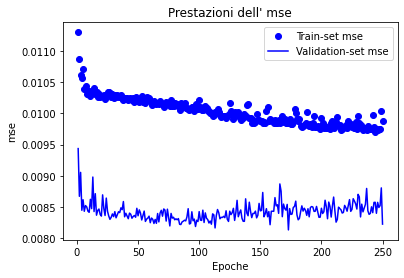

In [ ]:
plot_training(history.history)

## Provo a ridurre l'overfit

### 1) Alleggerisco il modello


In [ ]:
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                hidden_layers=1,
                hidden_layer_neurones=32)

history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [ ]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.876
Test accuracy 0.807


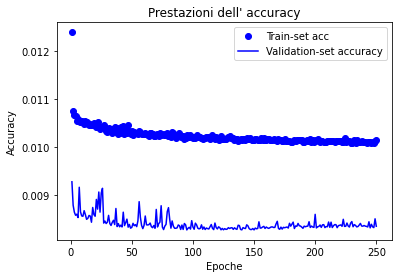

In [ ]:
plot_training(history.history)

### 2) Mi fermo prima con le epoche

In [ ]:
number_features = X_train_sc.shape[1]
model = make_net(number_features)

history = model.fit(X_train_sc,
                    y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [ ]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.868
Test accuracy 0.803


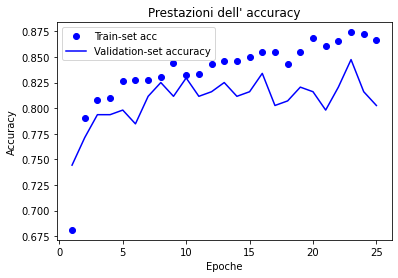

In [ ]:
plot_training(history.history)

### 3) Aggiungo i dropout

In [ ]:
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                dropout=0.5)

history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [ ]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.894
Test accuracy 0.794


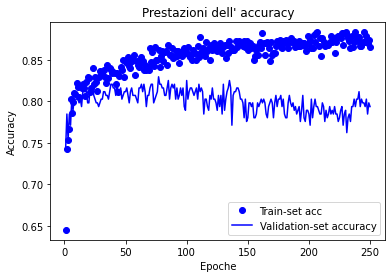

In [ ]:
plot_training(history.history)

### 5) Unisco varie tecniche sopra, più mi faccio aiutare da keras per interrompere quando raggiungo il picco (aggiungendo un piccolo momentum per non fermarmi in un minimo locale)

In [ ]:
# Chiedo a keras di fermarsi quando trova un massimo
# Provo 25 epoche dopo il massimo per verificare di non essere in un max locale
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)

number_features = X_train_sc.shape[1]
model = make_net(
    number_features,
    hidden_layers=2,
    hidden_layer_neurones=64,
    dropout=0.3)

history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0,
                    callbacks=[early_stopping_cb])

In [ ]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.837
Test accuracy 0.807


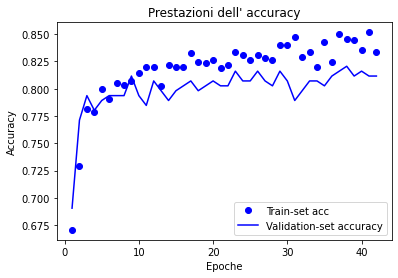

In [ ]:
plot_training(history.history)

## Salvo il modello (colab lo cancella bisogna scaricarlo)

In [ ]:
model.save('titanic_tf_model.h5')

# Load and use saved model - we need to first set up a model
restored_model = keras.models.load_model('titanic_tf_model.h5')
 
# Predict classes as normal
predicted_proba = restored_model.predict(X_test_sc)

# Show examples of predicted probability
print(predicted_proba[0:5].flatten())

[0.12492877 0.14467469 0.15842554 0.8935989  0.60607624]


In [ ]:
calculate_accuracy(restored_model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.837
Test accuracy 0.807


In [ ]:
sub = pd.DataFrame(columns=['PassengerId','Survived'])
prova=pd.read_csv('https://raw.githubusercontent.com/marcosarto/titanicML/main/neural_network/test.csv')
passengerId=prova['PassengerId']
probability = restored_model.predict(marcello_sc)
y_test_pred = probability.flatten()
y_test_pred = np.around(y_test_pred)
y_test_pred = y_test_pred.astype(int)
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': y_test_pred})
kaggle.to_csv('Neural.csv', index=False)